Machine Learning project for Python Class: A neural network distinguishing cats and dogs
Creator: Michał Kloska

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras

from sklearn.model_selection import train_test_split

In [2]:
from keras.preprocessing.image import load_img, img_to_array, image

In [3]:
#loading file names
import os

img_dir = r'C:\Users\Miszel\Desktop\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [21]:
full_images = [os.path.join(img_dir, img) for img in images]

In [22]:
full_images[:3]

['C:\\Users\\Miszel\\Desktop\\train\\cat.0.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.1.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.10.jpg']

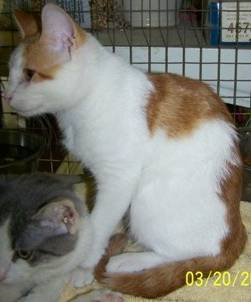

In [23]:
image_index = 6482
load_img(full_images[image_index])

In [24]:
#creating RGB layers for the model to detect colours
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

In [25]:
from imports_for_ML import load_images
#image import
x, y = load_images(img_dir, n_images=20000, resize=(150, 150))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [26]:
x.shape

(20000, 150, 150, 3)

In [33]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.models import load_model

In [28]:
#setting the test size to 15% of the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=42)

In [29]:
x_train.shape

(17000, 150, 150, 3)

In [30]:
x_test.shape

(3000, 150, 150, 3)

In [34]:
#creating the model
model = Sequential([
#first convolution layer, then max pooling
Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((3,3)),
BatchNormalization(),
Dropout(0.3),
#next convolution layer, then max pooling
Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.3),
#last convolution layer, then maxpooling
Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.3),

#flattening and adding 128 ordinary neurons
Flatten(),
Dense(128, activation = 'relu'),
Dropout(0.5),

#last binary neuron outputting 1 or 0; dog or cat
Dense(1, activation='sigmoid')

])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
#fitting the model and using early stopping and reducing learning rate to minimize overfitting
stop_early = EarlyStopping(patience = 4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=5, min_lr=0.001)
history = model.fit(x_train, y_train, epochs = 30, validation_split= 0.04, callbacks=[stop_early, reduce_lr])

Epoch 1/30
510/510 [==============================] - 110s 215ms/step - loss: 1.0652 - accuracy: 0.6553 - val_loss: 0.5304 - val_accuracy: 0.7456 - lr: 0.0010
Epoch 2/30
510/510 [==============================] - 110s 216ms/step - loss: 0.5267 - accuracy: 0.7393 - val_loss: 0.5327 - val_accuracy: 0.7324 - lr: 0.0010
Epoch 3/30
510/510 [==============================] - 110s 216ms/step - loss: 0.4868 - accuracy: 0.7689 - val_loss: 0.4771 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 4/30
510/510 [==============================] - 113s 221ms/step - loss: 0.4476 - accuracy: 0.7895 - val_loss: 0.4172 - val_accuracy: 0.7912 - lr: 0.0010
Epoch 5/30
510/510 [==============================] - 114s 224ms/step - loss: 0.4146 - accuracy: 0.8086 - val_loss: 0.4068 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 6/30
510/510 [==============================] - 108s 212ms/step - loss: 0.3939 - accuracy: 0.8230 - val_loss: 0.4000 - val_accuracy: 0.7971 - lr: 0.0010
Epoch 7/30
510/510 [==========================

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)      

In [37]:
keras.models.save_model(model = model, filepath = r'G:\My Drive\My Uni\Koźmin\Semester_2\Intro_python\Python_Proj\ML_Python_Proj\Michal_Kloska_46341_model', save_format = "h5")

In [4]:
model = keras.models.load_model(r'G:\My Drive\My Uni\Koźmin\Semester_2\Intro_python\Python_Proj\ML_Python_Proj\Michal_Kloska_46341_model')

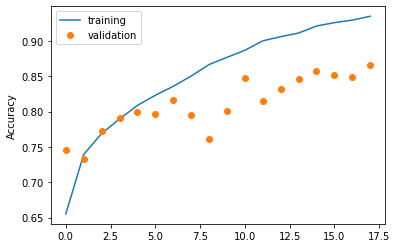

In [39]:
#plot of training and validation accuracy
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], 'o', label='validation')
plt.ylabel('Accuracy')
plt.legend()

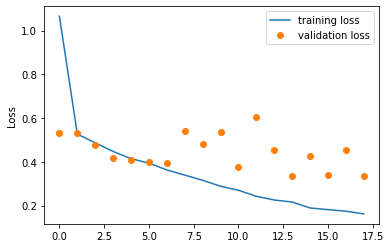

In [40]:
#plot of training and validation loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], 'o', label = 'validation loss')
plt.ylabel('Loss')
plt.legend()

In [41]:
#loss on the training and test datasets
train_corr = model.fit(x_train, y_train)

test_corr = model.fit(x_test, y_test)

94/94 [==============================] - 22s 233ms/step - loss: 0.4323 - accuracy: 0.8200


Accuracy on the training data:
532/532 [==============================] - 27s 51ms/step - loss: 0.2206 - accuracy: 0.9402
0.9401764869689941

Accuracy on the test data:
94/94 [==============================] - 5s 50ms/step - loss: 0.2952 - accuracy: 0.8830
0.8830000162124634


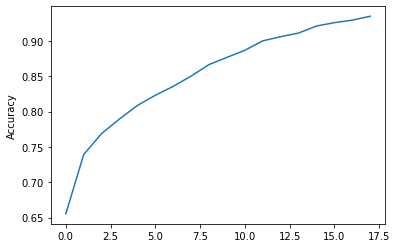

In [42]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(x_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(x_test, y_test)[1])

In [43]:
#first 25 test photos:
test_sample = x_test[:25]
predictions = model.predict(test_sample)
true_labels = y_test[:25]

C:\Users\Miszel\AppData\Local\Temp\ipykernel_17628\3742274066.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))


(-0.5, 149.5, 149.5, -0.5)

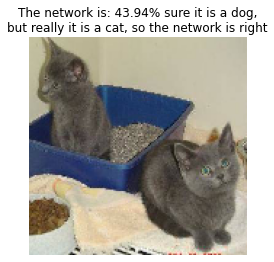

In [44]:
check_idx = 10
plt.imshow(test_sample[check_idx] / 255)

text = 'The network is: {:.2f}% sure it is a dog,\nbut really it is a {}, so the network {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5

plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

In [45]:
import random
test_sample = x_test
predictions = model.predict(test_sample)
true_labels = y_test
#lists and random var. for below loop
im_corr = []
im_corr_claim = []
im_incorr = []
im_incorr_claim = []
y = random.sample(range(1000), 100)
y = np.array(y)

In [46]:
#loop iterating over random variables to receive 6 random correctly predicted photos and 6 random incorrectly predicted photos
for x in np.nditer(y):
    z = (test_sample[x]/255)
    correct_response = true_labels[x]
    it_is_really = ['cat', 'dog'][correct_response]
    img_array = img_to_array(z)
    net_claims = pd.to_numeric(predictions[x,0])
    if net_claims > 0.5 and it_is_really == 'cat':
        if len(im_incorr) > 5:
            pass
        else:
            im_incorr.append(z)
            im_incorr_claim.append(net_claims)
    elif net_claims > 0.5 and it_is_really == 'dog':
        if len(im_corr) > 5:
            pass
        else:
            im_corr.append(z)
            im_corr_claim.append(net_claims)
    elif net_claims <= 0.5 and it_is_really == 'cat':
        if len(im_corr) > 5:
            pass
        else:
            im_corr.append(z)
            im_corr_claim.append(net_claims)
    elif net_claims <= 0.5 and it_is_really == 'dog':
        if len(im_incorr) > 5:
            pass
        else:
            im_incorr.append(z)
            im_incorr_claim.append(net_claims)

print(len(im_corr))
print(len(im_incorr))
print(len(im_corr_claim))
print(len(im_incorr_claim))

6
6
6
6


Text(0.5, 1.0, '56.131%')

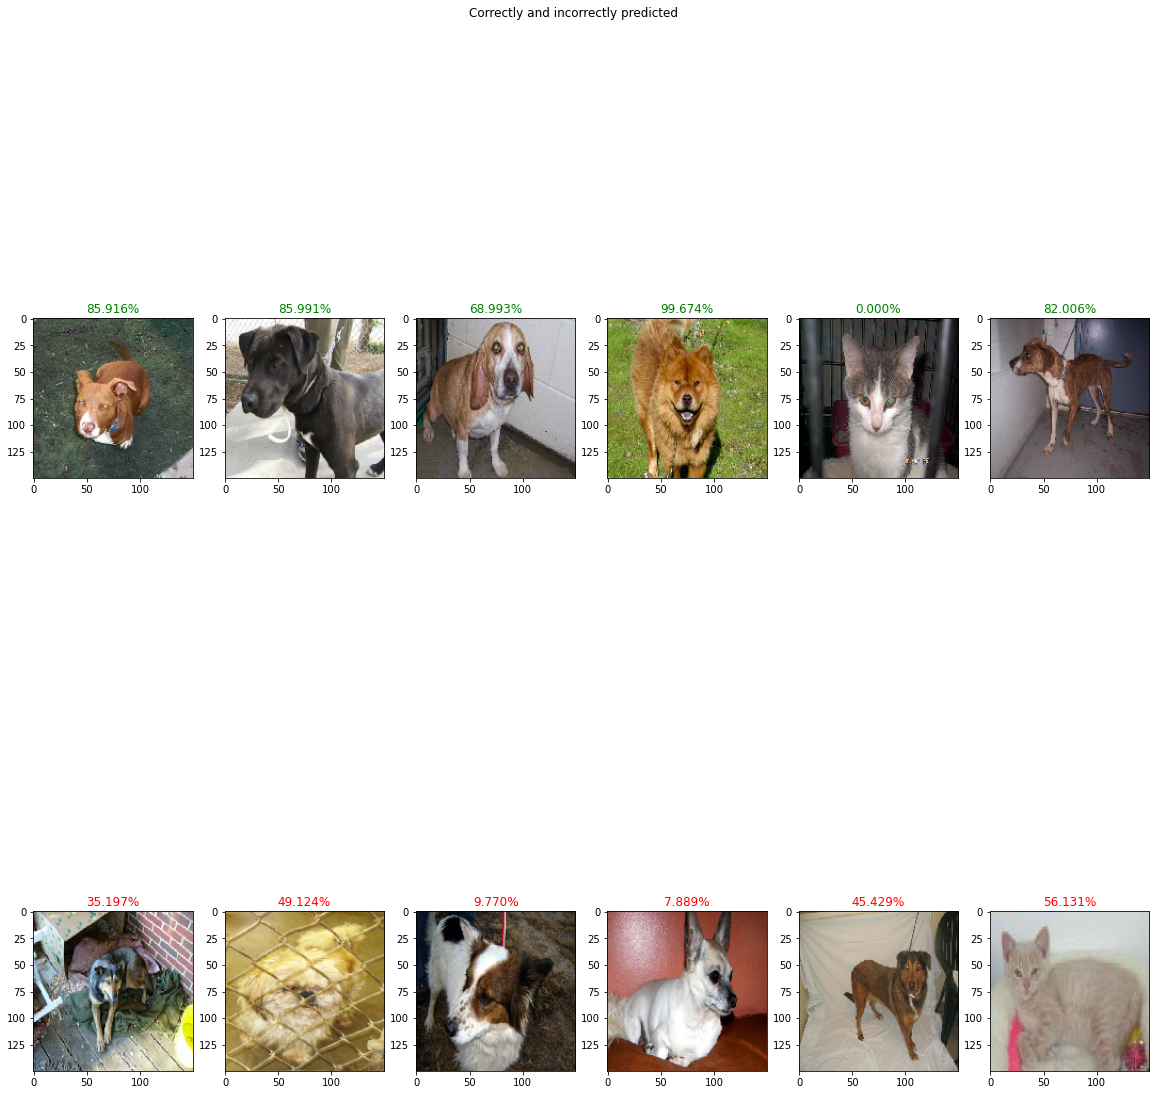

In [47]:
#showcasing the 12 random photos from the loop above
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 20))
plt.suptitle("Correctly and incorrectly predicted")

ax[0, 0].imshow(im_corr[0]) 
ax[0, 0].set_title('{:.3f}%'.format(im_corr_claim[0] * 100), color = 'green')

ax[0, 1].imshow(im_corr[1]) 
ax[0, 1].set_title('{:.3f}%'.format(im_corr_claim[1] * 100), color = 'green')

ax[0, 2].imshow(im_corr[2]) 
ax[0, 2].set_title('{:.3f}%'.format(im_corr_claim[2] * 100), color = 'green')

ax[0, 3].imshow(im_corr[3]) 
ax[0, 3].set_title('{:.3f}%'.format(im_corr_claim[3] * 100), color = 'green')

ax[0, 4].imshow(im_corr[4]) 
ax[0, 4].set_title('{:.3f}%'.format(im_corr_claim[4] * 100), color = 'green')

ax[0, 5].imshow(im_corr[5]) 
ax[0, 5].set_title('{:.3f}%'.format(im_corr_claim[5] * 100), color = 'green')

ax[1, 0].imshow(im_incorr[0]) 
ax[1, 0].set_title('{:.3f}%'.format(im_incorr_claim[0] * 100), color = 'red')

ax[1, 1].imshow(im_incorr[1]) 
ax[1, 1].set_title('{:.3f}%'.format(im_incorr_claim[1] * 100), color = 'red')

ax[1, 2].imshow(im_incorr[2]) 
ax[1, 2].set_title('{:.3f}%'.format(im_incorr_claim[2] * 100), color = 'red')

ax[1, 3].imshow(im_incorr[3]) 
ax[1, 3].set_title('{:.3f}%'.format(im_incorr_claim[3] * 100), color = 'red')

ax[1, 4].imshow(im_incorr[4]) 
ax[1, 4].set_title('{:.3f}%'.format(im_incorr_claim[4] * 100), color = 'red')

ax[1, 5].imshow(im_incorr[5]) 
ax[1, 5].set_title('{:.3f}%'.format(im_incorr_claim[5] * 100), color = 'red')

In [9]:
img = load_img(r'C:\Users\Miszel\Desktop\ML_TEST\Matcha_2.jpg', target_size=(150,150))

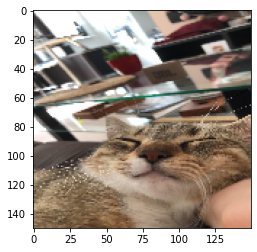

In [10]:
#testing the model on my cat <3
plt.imshow(img)

In [11]:
#transformation to an array
img_array = img_to_array(img)

In [12]:
#model prediction
model.predict(img_array.reshape(1,150,150,3))
#very low number, meaning the model is correct

array([[0.00046429]], dtype=float32)